In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split


data = pd.read_csv('..\data\houses.csv')
data.columns # 查看列名

Index(['city', 'local', 'total_price', 'unit_price', 'layout', 'area', 'floor',
       'time', 'title'],
      dtype='object')

In [2]:
data1 = data.drop([ 'local', 'layout',  'floor','time', 'title'],axis=1)
data1

,city,total_price,unit_price,area
0,苏州,173.0,10035,172.40
1,北京,645.0,75731,85.17
2,苏州,120.0,28170,42.60
3,苏州,172.0,21492,80.03
4,苏州,180.0,20738,86.80
...,...,...,...,...
14891,成都,165.0,18511,89.14
14892,上海,508.0,33028,153.81
14893,苏州,150.0,22880,65.56
14894,苏州,135.0,24726,54.60


In [3]:
data2 = data1.loc[data1['city']=='苏州']
data2

,city,total_price,unit_price,area
0,苏州,173.0,10035,172.40
2,苏州,120.0,28170,42.60
3,苏州,172.0,21492,80.03
4,苏州,180.0,20738,86.80
6,苏州,400.0,21425,186.70
...,...,...,...,...
14880,苏州,429.0,43571,98.46
14889,苏州,188.0,29842,63.00
14893,苏州,150.0,22880,65.56
14894,苏州,135.0,24726,54.60


In [4]:
data3 = data2.drop('city',axis=1)
data3

,total_price,unit_price,area
0,173.0,10035,172.40
2,120.0,28170,42.60
3,172.0,21492,80.03
4,180.0,20738,86.80
6,400.0,21425,186.70
...,...,...,...
14880,429.0,43571,98.46
14889,188.0,29842,63.00
14893,150.0,22880,65.56
14894,135.0,24726,54.60


In [5]:
data3.shape

(3000, 3)

In [6]:
total = data3['total_price']
type(total)
total

0        173.0
2        120.0
3        172.0
4        180.0
6        400.0
         ...  
14880    429.0
14889    188.0
14893    150.0
14894    135.0
14895    270.0
Name: total_price, Length: 3000, dtype: float64

In [7]:
total = np.ravel(total)
type(total)
total

array([173., 120., 172., ..., 150., 135., 270.])

In [8]:
# 划分数据集
price = data3['total_price']

area = data3['area']

Price_train,Price_test,Area_train,Area_test = train_test_split(price,area,random_state=1)
Price_train = Price_train.values.reshape(-1,1)
Area_train = Area_train.values.reshape(-1,1)
Price_test = Price_test.values.reshape(-1,1)
Area_test = Area_test.values.reshape(-1,1)


print(Price_train.shape)
print(Price_test.shape)
print(Area_train.shape)
print(Area_test.shape)


(2250, 1)
(750, 1)
(2250, 1)
(750, 1)


In [9]:
linreg = linear_model.LinearRegression()

linreg.fit(Price_train,Area_train)# 拟合

print(linreg.intercept_) # 截距
print(linreg.coef_) # 系数

[61.65917722]
[[0.13844137]]


In [10]:
pre = linreg.predict(Price_test)
pre[:5]

array([[105.68353377],
       [ 81.20709906],
       [108.45236123],
       [ 88.37836217],
       [ 89.07056904]])

In [11]:
Price_test[:5]

array([[318. ],
       [141.2],
       [338. ],
       [193. ],
       [198. ]])

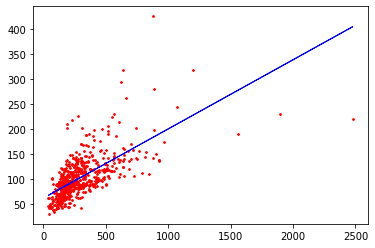

In [12]:
plt.scatter(Price_test,Area_test,color='r',s=3)
plt.plot(Price_test,linreg.predict(Price_test),'blue',linewidth=1)
plt.show()